# Assignment 22 - Tree

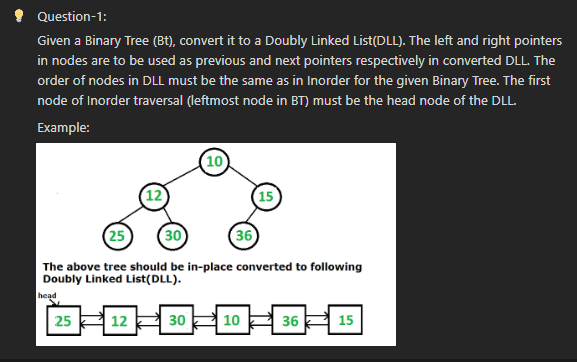

In [1]:
class Node:
    def __init__(self, val):
        self.right = None
        self.data = val
        self.left = None

prev = None

def BinaryTree_to_DoublyLinkedList(root):

    if root is None:
        return root

    head = BinaryTree_to_DoublyLinkedList(root.left);
    global prev

    if prev is None :
        head = root

    else:
        root.left = prev
        prev.right = root

    prev = root

    BinaryTree_to_DoublyLinkedList(root.right);

    return head

def print_dLL(head):

    while head is not None:
        print(head.data, end=" ")
        head = head.right


root = Node(10)
root.left = Node(12)
root.right = Node(15)
root.left.left = Node(25)
root.left.right = Node(30)
root.right.left = Node(36)

head = BinaryTree_to_DoublyLinkedList(root)
print_dLL(head)


25 12 30 10 36 15 

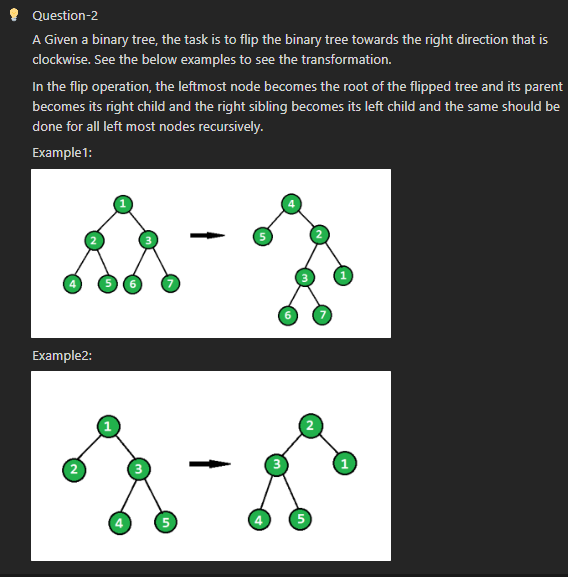

In [2]:
from collections import deque

class Node:

    def __init__(self, key):

        self.data = key
        self.left = None
        self.right = None

def flipBinaryTree(root):

    curr = root
    next = None
    temp = None
    prev = None

    while(curr):
        next = curr.left
        curr.left = temp
        temp = curr.right
        curr.right = prev

        prev = curr
        curr = next
    return prev

def printLevelOrder(root):

    if (root == None):
        return

    q = deque()
    q.append(root)

    while (1):

        nodeCount = len(q)
        if (nodeCount == 0):
            break

        while (nodeCount > 0):
            node = q.popleft()
            print(node.data, end = " ")

            if (node.left != None):
                q.append(node.left)

            if (node.right != None):
                q.append(node.right)
            nodeCount -= 1

        print()



root = Node(1)
root.left = Node(2)
root.right = Node(3)
root.right.left = Node(4)
root.right.right = Node(5)

print("Given tree")
printLevelOrder(root)

Root = flipBinaryTree(root)

print("\nFlipped Tree")
printLevelOrder(Root)


Given tree
1 
2 3 
4 5 

Flipped Tree
2 
3 1 
4 5 


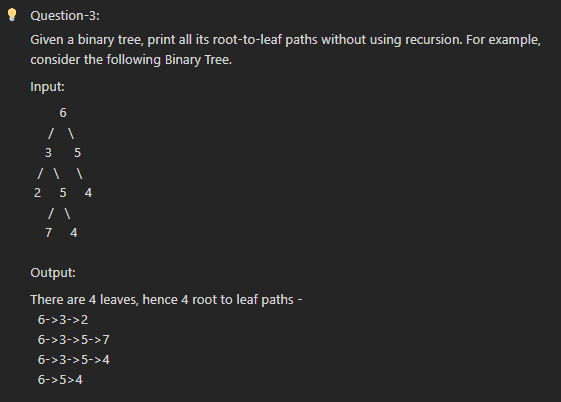

In [3]:
class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None

def newNode(data):
    temp = Node(data)
    return temp

def isleafnode(root):
    return not root.left and not root.right

def printRootToLeaf(root):

    if not root:
        return

    path = ""
    s = []
    s.append((root, path))

    while len(s) > 0:
        it = s.pop()
        root = it[0]
        path = it[1]

        curr = str(root.data) + " -> "
        path += curr

        if isleafnode(root):
            print(path)

        if root.right:
            s.append((root.right, path))
        if root.left:
            s.append((root.left, path))



root = newNode(6)
root.left = newNode(3)
root.right = newNode(5)
root.left.left = newNode(2)
root.left.right = newNode(5)
root.right.right = newNode(4)
root.left.right.left = newNode(7)
root.left.right.right = newNode(4)

printRootToLeaf(root)


6 -> 3 -> 2 -> 
6 -> 3 -> 5 -> 7 -> 
6 -> 3 -> 5 -> 4 -> 
6 -> 5 -> 4 -> 


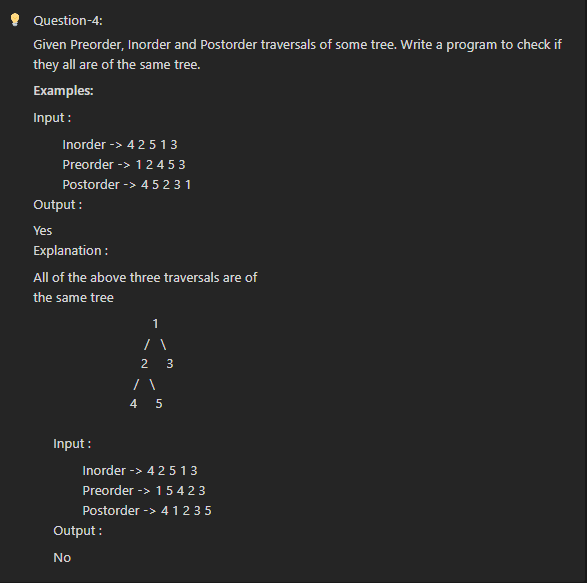

In [4]:
class node:

    def __init__(self, x):

        self.data = x
        self.left = None
        self.right = None

preIndex = 0

def search(arr, strt, end, value):

    for i in range(strt, end + 1):
        if(arr[i] == value):
            return i

def buildTree(inn, pre, inStrt, inEnd):

    global preIndex

    if(inStrt > inEnd):
        return None

    tNode = node(pre[preIndex])
    preIndex += 1

    if (inStrt == inEnd):
        return tNode

    inIndex = search(inn, inStrt,
                     inEnd, tNode.data)

    tNode.left = buildTree(inn, pre, inStrt,
                           inIndex - 1)
    tNode.right = buildTree(inn, pre,
                            inIndex + 1, inEnd)

    return tNode

def checkPostorder(node, postOrder, index):
    if (node == None):
        return index

    index = checkPostorder(node.left,
                           postOrder,
                           index)

    index = checkPostorder(node.right,
                           postOrder,
                           index)

    if (node.data == postOrder[index]):
        index += 1
    else:
        return - 1

    return index



inOrder = [4, 2, 5, 1, 3]
preOrder = [1, 2, 4, 5, 3]
postOrder = [4, 5, 2, 3, 1]
lenn = len(inOrder)

root = buildTree(inOrder, preOrder,
                     0, lenn - 1)

index = checkPostorder(root, postOrder, 0)

if (index == lenn):
    print("Yes")
else:
    print("No")


Yes
